In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
try:
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display the first few rows
print(df.head())

# Data structure and missing values
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# No missing values, but let's show how we'd drop or fill if there were any
df_cleaned = df.dropna()  # or use df.fillna(method='ffill') if needed


Dataset loaded successfully.
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Data Types:
 sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [2]:
# Basic statistics
print("\nDescriptive Statistics:\n", df.describe())

# Group by species and calculate mean of numerical columns
grouped_means = df.groupby('species').mean()
print("\nMean values per species:\n", grouped_means)

# Example Insight:
# We can see Setosa has much smaller petal measurements compared to Versicolor and Virginica.



Descriptive Statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Mean values per species:
             sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                  

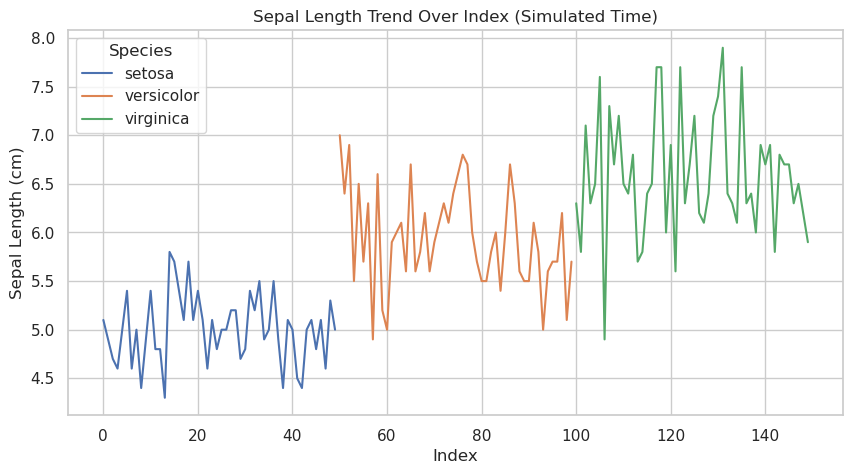

/tmp/ipykernel_233/3837369994.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df, ci=None)


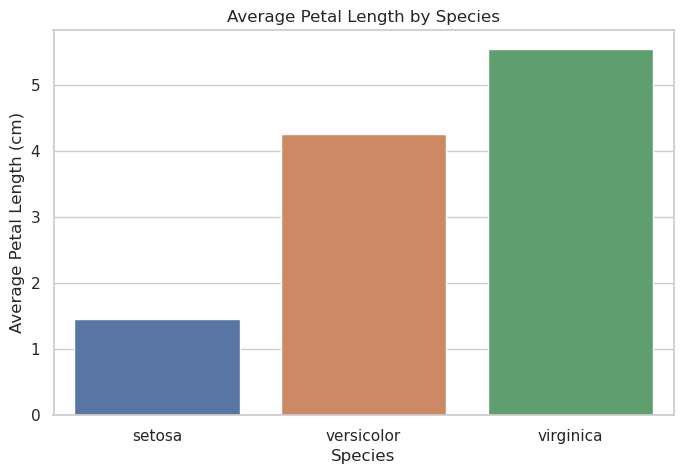

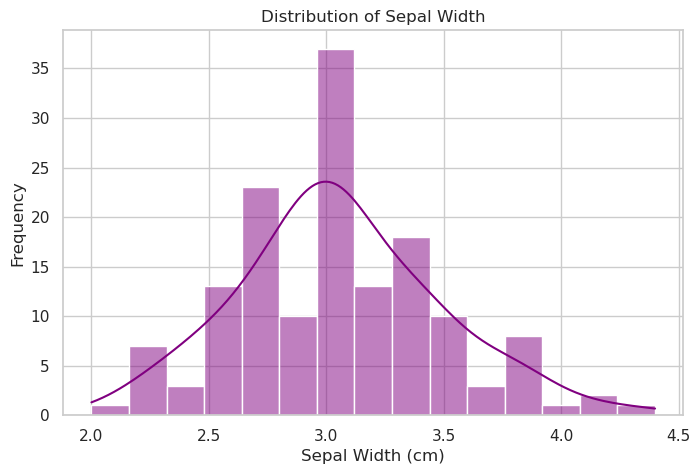

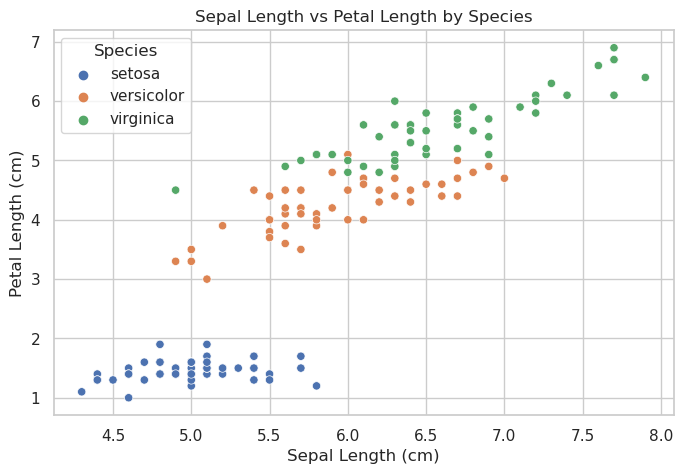

In [3]:
# Set style for seaborn
sns.set(style="whitegrid")

# 1. Line Chart – Simulated trend over time (adding fake time index)
df['index'] = range(len(df))
plt.figure(figsize=(10, 5))
sns.lineplot(x='index', y='sepal length (cm)', hue='species', data=df)
plt.title("Sepal Length Trend Over Index (Simulated Time)")
plt.xlabel("Index")
plt.ylabel("Sepal Length (cm)")
plt.legend(title="Species")
plt.show()

# 2. Bar Chart – Average petal length per species
plt.figure(figsize=(8, 5))
sns.barplot(x='species', y='petal length (cm)', data=df, ci=None)
plt.title("Average Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()

# 3. Histogram – Distribution of Sepal Width
plt.figure(figsize=(8, 5))
sns.histplot(df['sepal width (cm)'], kde=True, bins=15, color='purple')
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot – Sepal Length vs. Petal Length
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df)
plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()
